In [11]:
# read the data into a Pandas DataFrame
import pandas as pd
pima = pd.read_csv('/Users/jiahuali1991/Dropbox/Machine Learning/Data/UCI/Diabetes/Diabetes.csv')

In [12]:
# print the first 5 rows of data from the dataframe
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
# define X and y
X = pima.drop('Outcome',axis=1)
y = pima.Outcome

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([('scaler', StandardScaler()), ('model', classifier)])

pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [30]:
y_predict = pipeline.predict(X_test)

accuracy score

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.7480314960629921

balanced accuracy score

In [42]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_predict)

0.7102021040974529

f1 score

In [50]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_predict))


0.6144578313253013


precision recall

In [33]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_predict)
print(precision)
print(recall)
print(thresholds)

[0.33858268 0.6375     1.        ]
[1.         0.59302326 0.        ]
[0 1]


precision recall fscore support

In [51]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict)
print(precision)
print(recall)
print(fscore)
print(support)

[0.79885057 0.6375    ]
[0.82738095 0.59302326]
[0.8128655  0.61445783]
[168  86]


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.52')

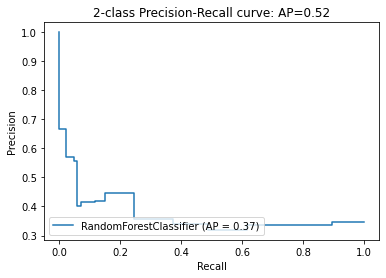

In [36]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

confusion matrix

In [44]:
# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test, y_predict)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(TP)
print(TN)
print(FP)
print(FN)

[[139  29]
 [ 35  51]]
51
139
29
35


classification report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       168
           1       0.64      0.59      0.61        86

    accuracy                           0.75       254
   macro avg       0.72      0.71      0.71       254
weighted avg       0.74      0.75      0.75       254



Jaccard score

In [52]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_predict)

0.4434782608695652